## Linear Regression
-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
-  Predict Y (Dependent Variable) on the basis of Xs (Independent Variables)
-  Y : Continous eg salary, age, increment
-  Xs : can be continous or discrete eg. gender, age, salary, experience in yrs etc
-  In this mtcars data set : Y (mpg) predict on the basis of Xs (wt, hp, gear)
-  Steps
    -  from sklearn.linear_model import LinearRegression
    -  model = LinearRegression().fit(X,y)
    -  r_sq = model.score(X, y)
    -  y_pred = model.predict(X)
    -  Y_pred(new) = model.predict(X new)

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [4]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
print(mt.dtypes, '\n', mt[['mpg','wt','hp','gear']].head())

(32, 11) Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object') 

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object 
                     mpg     wt   hp  gear
Mazda RX4          21.0  2.620  110     4
Mazda RX4 Wag      21.0  2.875  110     4
Datsun 710         22.8  2.320   93     4
Hornet 4 Drive     21.4  3.215  110     3
Hornet Sportabout  18.7  3.440  175     3


## Sklearn 
### Simple Linear Regression

In [5]:
from sklearn.model_selection import train_test_split  #split
from sklearn.linear_model import LinearRegression  #model

In [6]:
df = mt[['mpg','wt']].copy()
df.head(2)

,mpg,wt
Mazda RX4,21.0,2.620
Mazda RX4 Wag,21.0,2.875


In [9]:
df.corr()

,mpg,wt
mpg,1.000000,-0.867659
wt,-0.867659,1.000000


In [10]:
X = df.drop(columns='wt')
y = df.wt
print(X.shape, y.shape)

(32, 1) (32,)


In [11]:
model = LinearRegression().fit(X, y)
model

LinearRegression()

In [12]:
print('R2 ',model.score(X,y))
# 75% of the variation in y(mpg) is dependent on Xs (wt) which are in the model

R2  0.7528327936582646


In [13]:
y_pred = model.predict(X).round(2)
y_pred

array([3.09, 3.09, 2.84, 3.03, 3.41, 3.5 , 4.03, 2.61, 2.84, 3.34, 3.54,
       3.74, 3.61, 3.91, 4.58, 4.58, 3.98, 1.48, 1.77, 1.27, 3.02, 3.86,
       3.91, 4.17, 3.34, 2.2 , 2.38, 1.77, 3.82, 3.27, 3.93, 3.03])

In [15]:
model.coef_, model.intercept_
#y = 6.04 + -.14 * x

(array([-0.14086197]), 6.047255013458308)

In [16]:
#y.tolist()
32 * .8

25.6

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  #rows=32*.8, 1(wt)

(25, 1) (7, 1) (25,) (7,)


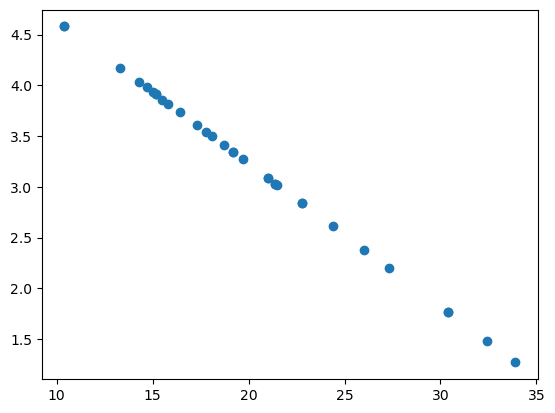

In [21]:
plt.scatter(x=X, y=y_pred)
plt.show()

## Multiple Linear Regression
- DV - multiple IVs

In [ ]:
data1 = mt[['mpg','wt','hp','gear']].copy()
X = data1.drop(columns='mpg')  #predict mpg - Y so drop from X
y = data1.mpg  # Dep Variable
print('IVs - ', X.shape, X.columns, ': DVs - ', y.shape,  y.name)
#rows/cols of X, y, ; names of columsn in X, y

In [ ]:
print(X.head(3), '\n', y.head(3))

In [ ]:
data1.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
reg1 = LinearRegression().fit(X_train,y_train)

In [ ]:
print('R2 ', reg1.score(X,y))
#83% of variation in Y (mpg) is dependent on X (wt, hp, gear)

In [ ]:
print('Coefficients ', reg1.coef_)
print(X_train.columns)
#if u increase wt by 1 unit, mpg will decrease by 3 units (-3)

In [ ]:
reg1.intercept_

-   mpg = 32 + -3 * wt + -.03 * hp + .94 * gear 

In [ ]:
y_pred = reg1.predict(X_train).round(2)
print('Predict MPG for given X values \n ', y_pred)

In [ ]:
print(X.head(2), '\n')
print(X.describe())  #sample values between min and max of each variable

In [ ]:
y_test_pred = reg1.predict(X_test).round(2)
print('Predict MPG for from test Data ', y_test_pred)

In [ ]:
#print(X_test)
#print(y_test)
#print(y_test_pred)
pd.concat([X_test.reset_index(), y_test.reset_index(), pd.Series(y_test_pred)], axis=1, ignore_index=True)
#pd.concat([X_test, y.reset_index(), pd.Series(y_test_pred)],axis=1, ignore_index=True).head()
#print(32 + -3 * 2.78 + -.03 * 109 + .94 * 4)
#col 5 - actual mpg, col 6- predicted mpg

In [ ]:
print(y_test, y_test_pred)

In [ ]:
print(type(y_test), type(y_test_pred))

In [ ]:
# Combine as DF
pd.concat([y_test.reset_index(), pd.Series(y_test_pred)],axis=1, ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#pd.concat([y.reshape(-1,1), y_pred.reshape(-1,1)])

#there is difference between actual (1) and predicted values(2), which show accuracy of the model ?

In [ ]:
print(y_test)
print(y_test_pred)

In [ ]:
mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
print('Mean Squared Error ', mse.round(2), ' : Root Mean Squared Error - ', rmse.round(2))
#rmse should be as less as possible

## Predict for New Set of Values of Car

In [ ]:
#create new set of values
newData = pd.DataFrame({'wt':[3,5,6], 'hp':[200, 100,300], 'gear':[5,4,3]})
newData

In [ ]:
print('Predict MPG for new Set of Data ', reg1.predict(newData).round(2))

# Stats Model
https://www.statsmodels.org/stable/regression.html

In [ ]:
#different library
from statsmodels.formula.api import ols

In [ ]:
data1 = mt[['mpg','wt','hp','gear']].copy()
X = data1.drop(columns='mpg')  #predict mpg - Y so drop from X
y = data1.mpg  # Dep Variable
print('IVs - ', X.shape, X.columns, ': DVs - ', y.shape,  y.name)
#rows/cols of X, y, ; names of columsn in X, y

In [ ]:
reg2 = ols("mpg ~ wt + hp + gear", data=data1).fit()

In [ ]:
#skipping the splitting of data into train and test

In [ ]:
y_predOLS  = reg2.predict().round(2)
print(' Predicted Values of MPG from OLS technique \t', y_predOLS)

In [ ]:
print('Predict MPG for new Set of Data from OLS\n', reg2.predict(newData).round(2))

In [ ]:
print('Summary of the Model ', reg2.summary())
#understand : R2, Adjust R2, AIC, p-Value of Coefficients, F-Stats

In [ ]:
#correlation map
sns.heatmap(data1.corr(), annot=True)

In [ ]:
# now try with any data set using above Linear Regression

### end here